<a href="https://colab.research.google.com/github/julianox5/Exercicios-Programacao-Curso-Machine-Learning-do-GoogleDevelopers/blob/master/05_Conjunto_de_Validacao_e_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Conjunto de validação e de teste
Os exercícios anteriores da Colab avaliaram o modelo treinado em relação ao conjunto de treinamento, o que não fornece um sinal forte sobre a qualidade do seu modelo. Neste Colab, você experimentará conjuntos de validação e conjuntos de testes.

## Objetivos de aprendizado
Depois deste Colab, você saberá como fazer o seguinte:
* Dividir um conjunto de treinamento em um conjunto menor de treinamento e um conjunto de validação.
* Analise deltas entre os resultados do conjunto de treinamento e do conjunto de validação.
* Testar o modelo treinado com um conjunto de testes para determinar se seu modelo treinado está se ajustando demais.
* Detectar e corrigir um problema de treinamento comum.

## O conjunto de dados
Como no exercício anterior, este exercício usa o conjunto de dados da California Housing para prever o `median_house_value`. Como muitos conjuntos de dados "famosos", o California Housing Dataset na verdade consiste em dois conjuntos de dados separados, cada um vivendo em arquivos .csv separados:
* O conjunto de treinamento é `california_housing_train.csv`
* O conjunto de teste é `california_housing_test.csv`

Vamos criar o conjunto de validação dividindo o conjunto de treinamento baixado em duas partes:
* Um conjunto de treinamento menor
* Um conjunto de validação


## Usar a versão correta do TensorFlow


In [0]:
%tensorflow_version 2.x 

## Importar modúlos nescessários
Essa primeira célula de código importa os módulos necessários e define algumas opções de exibição.

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

##Carregar os conjuntos de dados da Internet
Carregando os arquivos .csv separados e criando os dois DataFrames do pandas a seguir:
* Conjunto de treinamento `df_treinamento`
* Conjunto de teste `df_test`


In [0]:
df_treinamento = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
df_teste       = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")


##Escalar os valores dos rótulos
Dimensionando o median_house_value. Veja o exercício anterior da Colab para obter detalhes.


In [0]:
escalar = 1000.0
df_treinamento["median_house_value"] /= escalar
df_teste["median_house_value"] /= escalar


Carregar as funções para construir e treinar um modelo





In [64]:
def contruir_modelo(tx_aprendizado):

  modelo = tf.keras.models.Sequential()
 
  modelo.add(tf.keras.layers.Dense(units=1,
                                   input_shape=(1,)))
  
  modelo.compile(optimizer=tf.keras.optimizers.RMSprop(lr=tx_aprendizado),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return modelo

def treinar_modelo(modelo, df, recurso, rotulo,epocas, tam_lote=None, div_validacao=0.1):
  
  history = modelo.fit(x=df[recurso], 
                       y = df[rotulo],
                       epochs = epocas, 
                       batch_size = tam_lote, 
                       validation_split = div_validacao)
  
  peso_treinado = modelo.get_weights()[0]
  vies_treinado = modelo.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history 

print("Ok!")

Ok!


## Definir Funções de plotagem
A função `plot_curva_perda` plota perda versus época para o conjunto de treinamento e o conjunto de validação


In [65]:
def plot_curva_perda(epochs, mae_training, mae_validation):
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # Não vamos traçar a primeira época, já qua perda na primeira época
  # geralmente é substancialmente maior que a perda para outras épocas.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Definida função para plotar gráfico da curva de perda!")

Definida função para plotar gráfico da curva de perda!


## Tarefa 1: Experiência com a divisão de validação
Na célula de código a seguir, você verá uma variável denominada `validacao_div`, que inicializamos em 0,2. A variável `validacao_div` especifica a proporção do conjunto de treinamento original que servirá como o conjunto de validação. O conjunto de treinamento original contém 17.000 exemplos. Portanto, um `validacao_div` 0,2 significa que:
* 17.000 * 0,2 ~ = 3.400 exemplos se tornarão o conjunto de validação.
* 17.000 * 0,8 ~ = 13.600 exemplos se tornarão o novo conjunto de treinamento.

O código a seguir cria um modelo, o treina no conjunto de treinamento e avalia o modelo criado em ambos:
* Conjunto de treinamento
* Conjunto de validacao

Se os dados no conjunto de treinamento forem semelhantes aos dados no conjunto de validação, as duas curvas de perda e os valores de perda final deverão ser quase idênticos. No entanto, as curvas de perda e os valores de perda final não são quase idênticos. Hmm, isso é estranho.

Experimente com dois ou três valores diferentes de `validacao_div`. Valores diferentes de `validacao_div`correção do problema?

Epoch 1/30
136/136 [==============================] - 0s 2ms/step - loss: 0.0645 - root_mean_squared_error: 0.2540 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2316
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 0.0482 - root_mean_squared_error: 0.2194 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1829
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1619
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 0.0474 - root_mean_squared_error: 0.2177 - val_loss: 0.0704 - val_root_mean_squared_error: 0.2653
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 0.0492 - root_mean_squared_error: 0.2218 - val_loss: 0.0983 - val_root_mean_squared_error: 0.3135
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 0.0471 - root_mean_squared_error: 0.2169 - val_loss: 0.0239 - val_

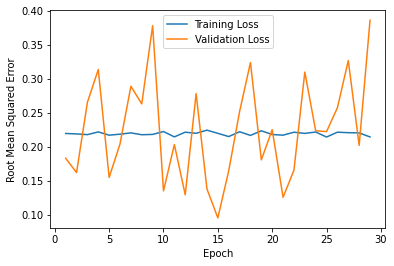

In [73]:
# Definindo os hiperparâmetros
tx_aprendizado = 0.08
epochs = 30 
tam_lote = 100

#dividindo o conjunto de treinamento original em um conjunto reduzido e um 
#conjunto de treinamento
validacao_div = 0.2

#identifica o recurso e o rótulo 
meu_recurso = "median_income" # renda media em um quarteirao específico
meu_rotulo  = "median_house_value" # o valor medio de uma casa em uma cidade expecífica por bloco
# Vamos criar um modelo que prevê o valor da casa com base na renda media do bairro

# descartar qualquer versão pré-existente do modelo.
meu_modelo = None

# invocar as funções para criar e treinar o modelo
meu_modelo = contruir_modelo(tx_aprendizado)

epochs, rmse, history = treinar_modelo(meu_modelo, df_treinamento, 
                                       meu_recurso, meu_rotulo,
                                       epochs, tam_lote,
                                       validacao_div)

plot_curva_perda(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## Tarefa 2:Determinar por que as curvas de perda diferem
Não importa como você divide o conjunto de treinamento e o conjunto de validação, as curvas de perda diferem significativamente. Evidentemente, os dados no conjunto de treinamento não são semelhantes o suficiente para os dados no conjunto de validação. Contra-intuitivo? Sim, mas esse problema é realmente muito comum no aprendizado de máquina.

Sua tarefa é determinar por que as curvas de perda não são muito semelhantes. Como na maioria dos problemas de aprendizado de máquina, o problema está enraizado nos próprios dados. Para resolver esse mistério de por que o conjunto de treinamento e o conjunto de validação não são quase idênticos, escreva uma ou duas linhas do código pandas na célula de código a seguir.

R: Examine os exemplos 0 a 4 e os exemplos 25 a 29 o conjunto é classificado por longitude, aparentemente a longetude influência a relação  de `total_rooms` para `median_house_value`

In [52]:
df_treinamento.head(n=30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,0.1
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,0.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,0.1
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,0.1
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,0.1
...,...,...,...,...,...,...,...,...,...
25,-115.3,32.8,34.0,591.0,139.0,327.0,89.0,3.7,0.1
26,-115.4,32.8,30.0,1602.0,322.0,1130.0,335.0,3.6,0.1
27,-115.4,32.8,14.0,1276.0,270.0,867.0,261.0,1.9,0.1
28,-115.4,32.8,32.0,741.0,191.0,623.0,169.0,1.8,0.1


#Tarefa 3. Corrija o problema
Para corrigir o problema, embaralhe os exemplos no conjunto de treinamento antes de dividi-los em um conjunto de treinamento e validação. Para fazer isso, execute as seguintes etapas:

1 - Embaralhe os dados no conjunto de treinamento adicionando a seguinte linha em qualquer lugar antes de ligar `df_treinamento`(na célula de código associada à Tarefa 1):
```
embaralhar_treinamento = df_treinamento.reindex(np.random.permutation(df_treinamento.index))
```

2 - Passe shuffled_train_df(em vez de train_df) como o segundo argumento para train_model(na chamada de código associada à Tarefa) 

Com o conjunto de treinamento embaralhado, a perda final do treinamento está mais próxima da perda final do conjunto de validação?
Em que faixa de valores os valores de validacao_div perda final para o conjunto de treinamento e validação divergem significativamente? Por quê?

R: 

Sim, depois de embaralhar o conjunto de treinamento original, a perda final do conjunto de treinamento e da validação se torna muito mais próxima.

Se validation_div <0,15,
os valores de perda final para o conjunto de treinamento e validação divergem significativamente. Pelo visto,
o conjunto de validação não contém mais exemplos suficientes.

Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 0.0640 - root_mean_squared_error: 0.2530 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 2/70
136/136 [==============================] - 0s 1ms/step - loss: 0.0493 - root_mean_squared_error: 0.2221 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1535
Epoch 3/70
136/136 [==============================] - 0s 1ms/step - loss: 0.0511 - root_mean_squared_error: 0.2261 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1311
Epoch 4/70
136/136 [==============================] - 0s 1ms/step - loss: 0.0494 - root_mean_squared_error: 0.2222 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 5/70
136/136 [==============================] - 0s 1ms/step - loss: 0.0527 - root_mean_squared_error: 0.2295 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 6/70
136/136 [==============================] - 0s 1ms/step - loss: 0.0497 - root_mean_squared_error: 0.2229 - val_loss: 0.0849 - val_

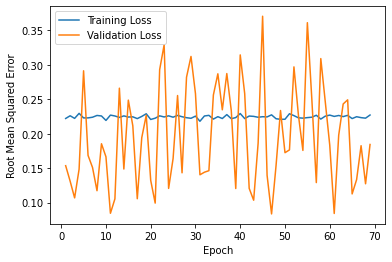

In [72]:
# ** 1 ** embaralhar os dados
embaralhar_treinamento = df_treinamento.reindex(np.random.permutation(df_treinamento.index))

# **  ***

# Definindo os hiperparâmetros
tx_aprendizado = 0.08
epochs = 70 
tam_lote = 100

#dividindo o conjunto de treinamento original em um conjunto reduzido e um 
#conjunto de treinamento
validacao_div = 0.2

#identifica o recurso e o rótulo 
meu_recurso = "median_income" # renda media em um quarteirao específico
meu_rotulo  = "median_house_value" # o valor medio de uma casa em uma cidade expecífica por bloco
# Vamos criar um modelo que prevê o valor da casa com base na renda media do bairro

# descartar qualquer versão pré-existente do modelo.
meu_modelo = None

# invocar as funções para criar e treinar o modelo
meu_modelo = contruir_modelo(tx_aprendizado)

# ** 2 ** Pasando embaralhar_treinamento como segundo argumento da minha função
epochs, rmse, history = treinar_modelo(meu_modelo, embaralhar_treinamento, 
                                       meu_recurso, meu_rotulo,
                                       epochs, tam_lote,
                                       validacao_div)
# ** 2 ** --------------------------------------------------------------------

plot_curva_perda(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


## Tarefa 4: use o conjunto de dados de teste para avaliar o desempenho do seu modelo
O conjunto de testes geralmente atua como o juiz final da qualidade de um modelo. O conjunto de testes pode servir como um juiz imparcial, porque seus exemplos não foram usados ​​no treinamento do modelo. Execute a seguinte célula de código para avaliar o modelo com o conjunto de testes:


In [71]:
x_test = df_teste[meu_recurso]
y_test = df_teste[meu_rotulo]

resultados = meu_modelo.evaluate(x_test, y_test, batch_size = tam_lote) 

30/30 [==============================] - 0s 1ms/step - loss: 0.0889 - root_mean_squared_error: 0.2982


Compare o erro quadrático médio raiz do modelo quando avaliado em cada um dos três conjuntos de dados:

* conjunto de treinamento: procure root_mean_squared_errorna época final do treinamento.
* conjunto de validação: procure val_root_mean_squared_errorna época final do treinamento.
* conjunto de teste: execute a célula de código anterior e examine o root_mean_squred_error.
Idealmente, o erro quadrático médio raiz dos três conjuntos deve ser semelhante. São eles?

`R: Em nossos experimentos sim, os valores rmse eram semelhantes o suficiente.` 
